In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df = df[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']]
df.head()

,GrLivArea,BedroomAbvGr,FullBath,SalePrice
0,1710,3,2,208500
1,1262,3,2,181500
2,1786,3,2,223500
3,1717,3,1,140000
4,2198,4,2,250000


In [5]:
df.isnull().sum()

,0
GrLivArea,0
BedroomAbvGr,0
FullBath,0
SalePrice,0


In [6]:
df = df.dropna()

In [7]:
X = df[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y = df['SalePrice']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(X_test)

In [11]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 2806426667.247853
R2 Score: 0.6341189942328371


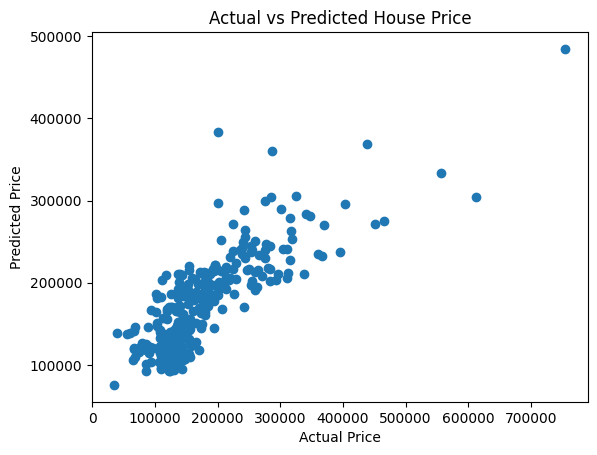

In [12]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.show()

In [13]:
new_house = np.array([[2000, 3, 2]])
predicted_price = model.predict(new_house)

print("Predicted House Price:", predicted_price[0])

Predicted House Price: 240377.51479736282


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
